In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

%load_ext autoreload
%autoreload 2

os.chdir('/content/drive/MyDrive/PR202010770/Lab03')

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

# 1. 모폴로지

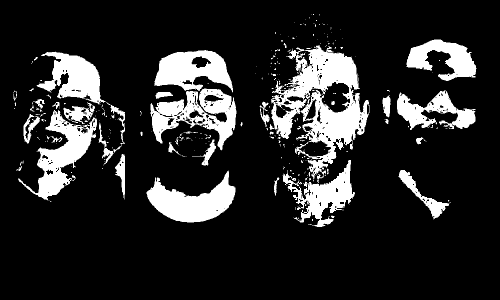

In [ ]:
img = cv2.imread('image/morph.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

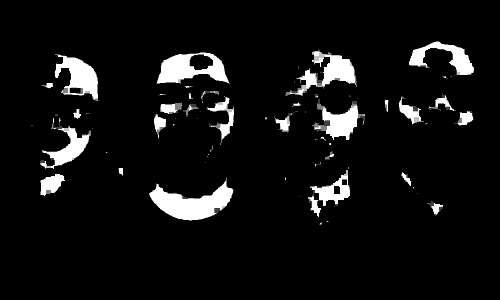

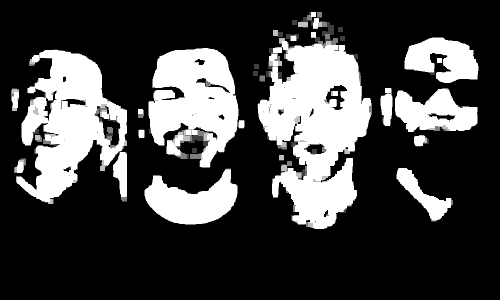

In [ ]:
kernel = np.ones((5,5))

morphed_erode= cv2.erode(img, kernel)     ## 침식
morphed_dilate= cv2.dilate(img, kernel)   ## 팽창

cv2_imshow(morphed_erode)
cv2_imshow(morphed_dilate)

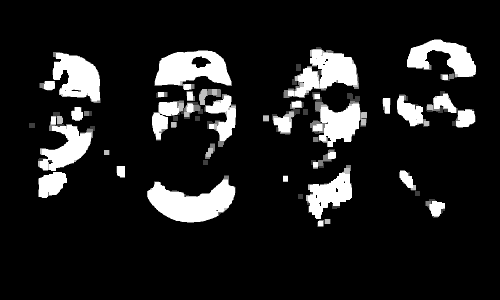

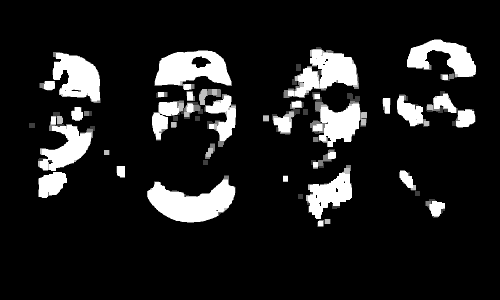

In [ ]:
morphed_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

morphed_erode= cv2.erode(img, kernel)     ## 침식
my_open= cv2.dilate(morphed_erode, kernel)   ## 팽창

cv2_imshow(cv2.resize(morphed_open, (500,300)))
cv2_imshow(cv2.resize(my_open, (500,300)))

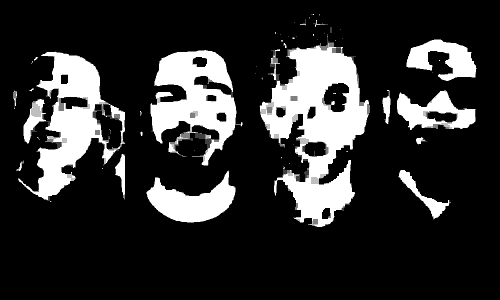

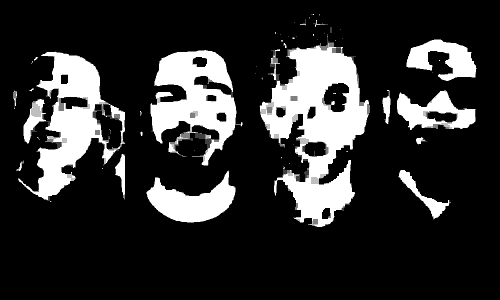

In [ ]:
kernel = np.ones((5,5))

morphed_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

morphed_dilate= cv2.dilate(img, kernel)   ## 팽창
my_close= cv2.erode(morphed_dilate, kernel)     ## 침식

cv2_imshow(morphed_close)
cv2_imshow(my_close)

# 2. 기하 변환

In [ ]:
court1 = cv2.imread("image/court1.png")
court2 = cv2.imread("image/court2.png")

playerA_1 = cv2.imread("image/playerA_1.png")
playerA_2 = cv2.imread("image/playerA_2.png")
playerA_3 = cv2.imread("image/playerA_3.png")
playerA_4 = cv2.imread("image/playerA_4.png")
playerA_5 = cv2.imread("image/playerA_5.png")

playerB_1 = cv2.imread("image/playerB_1.png")
playerB_2 = cv2.imread("image/playerB_2.png")
playerB_3 = cv2.imread("image/playerB_3.png")
playerB_4 = cv2.imread("image/playerB_4.png")

referee = cv2.imread("image/referee.png")

## 예시: Rotation

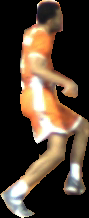

==== AFTER Geometric Transformation ====
[[ 6.123234e-17 -1.000000e+00  2.180000e+02]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]]


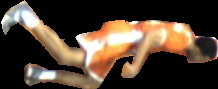

In [ ]:
img = playerB_3
cv2_imshow(img)

## img.shape[0]과 img.shape[1]이 헷갈릴 경우 미리 변수로 정하고 사용 가능합니다.
height = img.shape[0]
width = img.shape[1]

d90 = 90.0 * np.pi / 180    # 90도

# 동차 행렬을 이용한 기하 변환

M1 = np.array([[np.cos(d90), -1* np.sin(d90), 0], ## 90도 회전
               [np.sin(d90), np.cos(d90), 0],
               [0, 0, 1]], dtype=np.float32)


M2 = np.array([[1, 0, height],
               [0, 1, 0],
               [0, 0, 1]], dtype=np.float32)


my_M = np.matmul( M2, M1) ## 회전(M1) 먼저 하고 이동 (M2)
my_M = my_M[0:2, :]  ## 함수에 입력으로 들어가도록 크기 맞추기


print('==== AFTER Geometric Transformation ====')
print(my_M)
my_result = cv2.warpAffine(img, my_M, (height, width))    ## 이미지, 계산된 행렬, 표기할 이미지 크기(가로 길이, 세로 길이)
cv2_imshow(my_result)


In [ ]:
## 배경 이미지 위에 물체 이미지를 올리는 코드
## background_img : 배경 이미지
## object_img : 물체 이미지
## x_offset : 물체를 위치할 X 좌표 (x 좌측 끝 점)
## y_offset : 물체를 위치할 Y 좌표 (y 위쪽 끝 점)
def insert_img(background_img, object_img, x_offset, y_offset):

  x_end = x_offset + object_img.shape[1]  ## x 우측 끝 점
  y_end = y_offset + object_img.shape[0]  ## y 아래쪽 끝 점

  output_img = np.copy(background_img)    ## 출력 이미지

  for idxy, y in enumerate(range(y_offset,y_end)):
    for idxx, x in enumerate(range(x_offset,x_end)):
      if sum(object_img[idxy, idxx]) == 0:    ## 만약 물체 이미지 값이 검은색일 경우
        output_img[y,x] = background_img[y,x]   ## 배경 이미지 값 넣기
      else:
        output_img[y,x] = object_img[idxy, idxx]    ## 아닐 경우 물체 이미지 값 넣기

  return output_img

In [ ]:
testinsert = insert_img(court1, playerA_1, 100, 100)
testinsert = insert_img(testinsert, playerB_1, 700, 600)
testinsert = insert_img(testinsert, referee, 100, 1)
cv2_imshow(testinsert)

Output hidden; open in https://colab.research.google.com to view.